In [1]:
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import sys
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
import SPACEL
from SPACEL import Splane

In [3]:
adata = sc.read('D:\pythonplaces\deconv-mulST\Baseline\Spoint\Result\Dataset3\paient_H\st.h5ad')
adata

AnnData object with n_obs × n_vars = 1726 × 1351
    obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'T-cells', 'Cancer Epithelial', 'Myeloid', 'Endothelial', 'CAFs', 'PVL', 'Normal Epithelial', 'Plasmablasts', 'B-cells'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltypes', 'hvg'
    layers: 'norm'

In [4]:
adata.uns['celltypes']

array(['T-cells', 'Cancer Epithelial', 'Myeloid', 'Endothelial', 'CAFs',
       'PVL', 'Normal Epithelial', 'Plasmablasts', 'B-cells'],
      dtype=object)

In [6]:
adata.obs['batch_name_new'].unique()

array([1, 2, 3], dtype=int64)

In [8]:

section_ids = [1,2,3]
adata_list = []

for idx, sid in enumerate(section_ids):
    sub_adata = adata[adata.obs['batch_name_new'] == sid]
    adata_list.append(sub_adata)

adata_list


[View of AnnData object with n_obs × n_vars = 613 × 1351
     obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'T-cells', 'Cancer Epithelial', 'Myeloid', 'Endothelial', 'CAFs', 'PVL', 'Normal Epithelial', 'Plasmablasts', 'B-cells'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'celltypes', 'hvg'
     layers: 'norm',
 View of AnnData object with n_obs × n_vars = 603 × 1351
     obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'T-cells', 'Cancer Epithelial', 'Myeloid', 'Endothelial', 'CAFs', 'PVL', 'Normal Epithelial', 'Plasmablasts', 'B-cells'
     var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'celltypes', 'hvg'
     layers: 'norm',
 View of AnnData object with n_obs × n_vars = 510 × 1351
     obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'sele

In [9]:
import importlib
import base_model

importlib.reload(base_model)
splane_model = Splane.init_model(adata_list, n_clusters=6,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5) 
splane_model.train(d_l=0.5)
splane_model.identify_spatial_domain()

Setting global seed: 42
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_22972\3296340625.py", line 6, in <module>
    splane_model = Splane.init_model(adata_list, n_clusters=6,use_gpu=False,n_neighbors=8,k=1,gnn_dropout=0.5)
  File "D:\pythonplaces\SPACEL-main\SPACEL\Splane\model.py", line 65, in init_model
    sq.gr.spatial_neighbors(expr_ad,coord_type='grid',n_neighs=n_neighbors)
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\squidpy\gr\_build.py", line 109, in spatial_neighbors
    _assert_spatial_basis(adata, spatial_key)
  File "D:\Anaconda3\envs\Spoint\lib\site-packages\squidpy\gr\_utils.py", line 151, in _assert_spatial_basis
    raise KeyError(f"Spatial basis `{key}` not found in `adata.obsm`.")
KeyError: 'Spatial basis `spatial` not found in `adata.obsm`.'

During handling of the above exception, an

In [10]:
stdata=sc.read_h5ad('D:\pythonplaces\SPACEL-main\SPACEL\Splane\Result\dataset3/dataset3_st.h5ad')
stdata

AnnData object with n_obs × n_vars = 1726 × 1351
    obs: 'x', 'y', 'new_x', 'new_y', 'pixel_x', 'pixel_y', 'selected', 'batch_name_new', 'Istrue', 'n_genes', 'batch', 'T-cells', 'Cancer Epithelial', 'Myeloid', 'Endothelial', 'CAFs', 'PVL', 'Normal Epithelial', 'Plasmablasts', 'B-cells', 'spatial_domain'
    obsm: 'spatial'
    layers: 'norm'

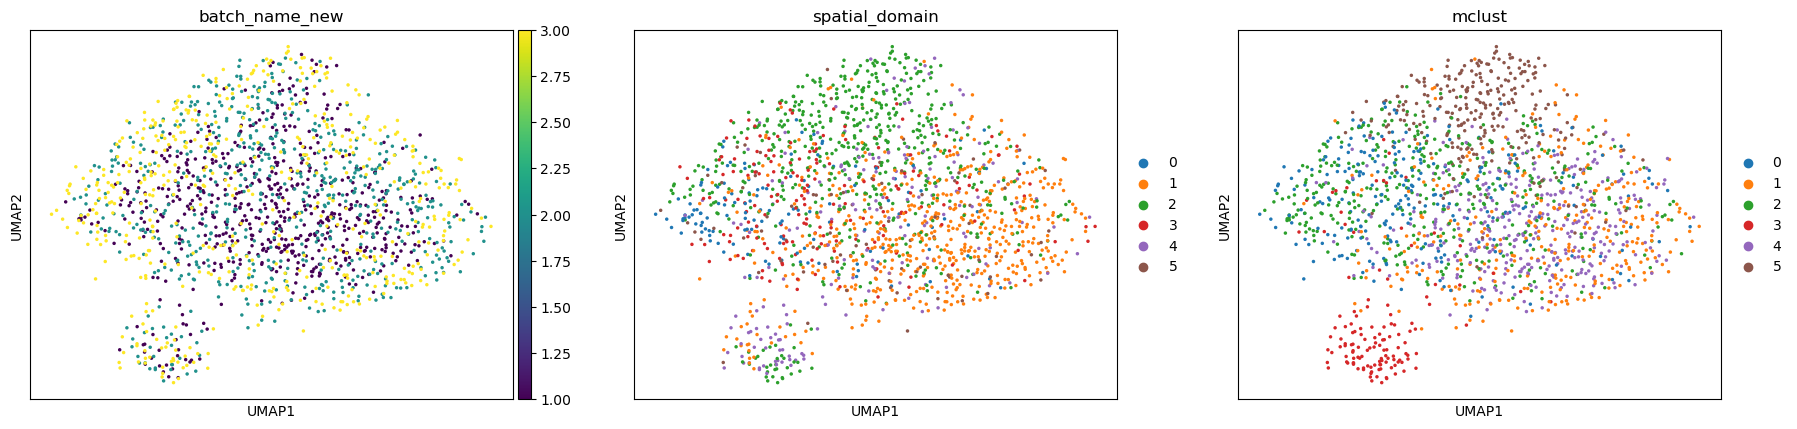

In [12]:
import anndata as ad
import numpy as np
from sklearn.cluster import KMeans
def Kmeans_cluster(adata, num_cluster,  key_added_pred="G3STNET", random_seed=2024):
    np.random.seed(random_seed)
    cluster_model = KMeans(n_clusters=num_cluster, init='k-means++', n_init=100, max_iter=1000, tol=1e-6)
    cluster_labels = cluster_model.fit_predict(adata.X)
    adata.obs[key_added_pred] = cluster_labels
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('int')
    adata.obs[key_added_pred] = adata.obs[key_added_pred].astype('category')
    return adata
adata_clu = Kmeans_cluster(stdata, num_cluster=6,  key_added_pred='mclust', random_seed=42)
sub_adata_tmp=adata_clu
sub_adata_tmp.obsm['latent_no_batch']=adata_clu.X
sc.pp.neighbors(sub_adata_tmp, use_rep='latent_no_batch', metric='cosine')
sc.tl.umap(sub_adata_tmp)
sc.pl.umap(sub_adata_tmp, color=['batch_name_new','spatial_domain','mclust'], show=True, size=25, save=False)

In [13]:
sub_adata_tmp.write_h5ad('D:\pythonplaces\SPACEL-main\SPACEL\Splane\Result\dataset3\dataset3_cluster.h5ad')